In [59]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score,train_test_split, StratifiedKFold, KFold,cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from tensorflow import keras as K
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape, Conv1D,Conv2D,Add, MaxPool1D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
import xgboost as xgb
import sklearn.svm as svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb
from sklearn.manifold import TSNE

In [60]:
input_data = pd.read_csv("/kaggle/input/time-series-repeat/Final_inputs_2.csv")
output_data = pd.read_csv("/kaggle/input/time-series-data/Final_outputs_2.csv")

In [61]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,0.111643,0.940038,0.964187,2.309274,-1.109878,-2.476828,0.113668,-1.160902,0.032550,0.965343,...,0.430604,0.242937,0.074334,-1.382336,0.060923,0.111643,0.940038,0.964187,2.309274,-1.109878
1,-0.299138,-0.692673,0.288300,-0.046446,-1.203138,0.169144,-0.697981,0.991973,-0.046535,0.459212,...,-1.126579,-0.299138,-0.692673,0.288300,-0.046446,-1.203138,0.169144,-0.697981,0.991973,-0.046535
2,-2.230861,0.445551,1.583041,0.926919,0.302206,-1.869937,1.526953,-2.230861,0.445551,1.583041,...,1.526953,-2.230861,0.445551,1.583041,0.926919,0.302206,-1.869937,1.526953,-2.230861,0.445551
3,-2.380272,-3.710303,2.863677,-0.218977,-0.823047,1.197829,-0.519877,-0.073044,-1.137473,-0.638890,...,1.541942,-0.032236,-0.739152,1.117301,-0.375303,-2.380272,-3.710303,2.863677,-0.218977,-0.823047
4,0.304581,1.143111,0.932990,2.370352,1.251088,2.857334,0.858400,-0.502346,0.151054,-0.865495,...,-1.538741,0.304581,1.143111,0.932990,2.370352,1.251088,2.857334,0.858400,-0.502346,0.151054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10426,0.679498,9.112654,-0.679954,-6.810731,12.957918,-1.059112,-1.535453,-7.257602,-5.919869,-6.127099,...,9.112654,-0.679954,-6.810731,12.957918,-1.059112,-1.535453,-7.257602,-5.919869,-6.127099,-8.945055
10427,-7.731459,3.617483,-6.452710,-12.723967,0.224578,-3.900863,2.833283,2.842826,-7.731459,3.617483,...,-12.723967,0.224578,-3.900863,2.833283,2.842826,-7.731459,3.617483,-6.452710,-12.723967,0.224578
10428,5.303833,1.917820,-3.722882,-2.541360,-0.927676,0.892363,-1.241966,-0.695779,-2.349699,7.033541,...,2.441109,0.909786,3.146901,2.301819,-0.504482,5.303833,1.917820,-3.722882,-2.541360,-0.927676
10429,1.895034,8.907249,-4.404327,-0.076114,1.158168,-2.667487,-2.038600,-3.653954,-0.706323,-3.482403,...,8.907249,-4.404327,-0.076114,1.158168,-2.667487,-2.038600,-3.653954,-0.706323,-3.482403,-1.945868


In [62]:
output_data

,label
0,0
1,1
2,2
3,0
4,1
...,...
10426,1
10427,2
10428,0
10429,1


In [63]:
length = len(output_data)

In [64]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [65]:
x = StandardScaler().fit_transform(x)

<Axes: ylabel='count'>

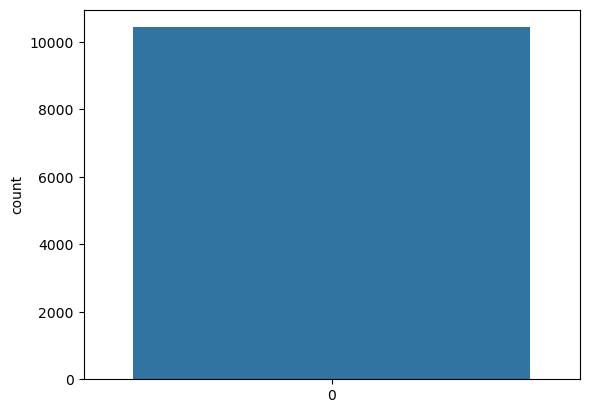

In [66]:
t = []
for i in range(len(y)):
    t.append(y[i][0])
import seaborn as sns 
sns.countplot(t)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [68]:
x_train.shape

(7823, 37)

In [69]:
ly_train = label_binarize(y_train, classes=[0, 1, 2])
ly_test = label_binarize(y_test, classes=[0, 1, 2])

In [70]:
x_train = np.array(x_train).reshape(-1,37,1)
x_test = np.array(x_test).reshape(-1,37,1)

In [71]:
inputs = tf.keras.Input(shape=(37,1))

Dense1 = Dense(32, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(64, return_sequences = True))(Dense1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  Bidirectional(LSTM(32, return_sequences = True))(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(64, activation = 'relu')(flat)
Dense_3 = Dense(32, activation = 'relu')(Dense_2)
outputs = Dense(3, activation='softmax')(Dense_3)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 37, 1)]           0         
                                                                 
 dense_8 (Dense)             (None, 37, 32)            64        
                                                                 
 bidirectional_4 (Bidirectio  (None, 37, 128)          49664     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 37, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 37, 64)           41216     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 37, 64)            0   

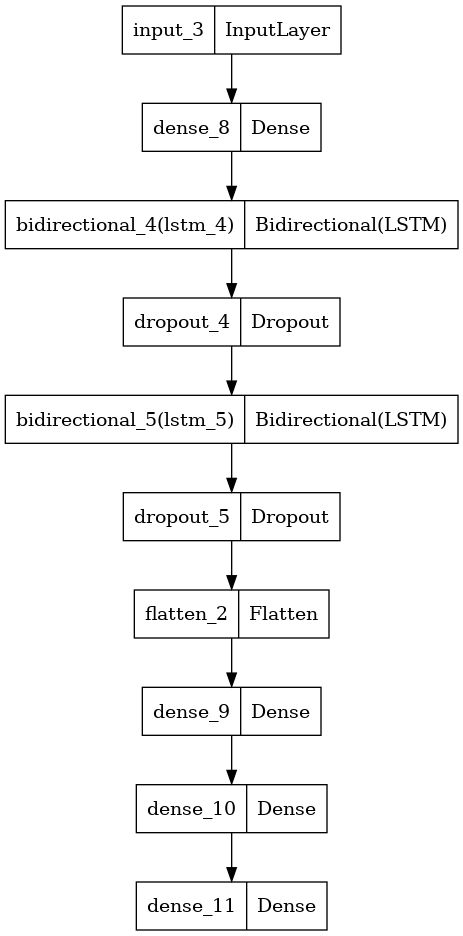

In [72]:
tf.keras.utils.plot_model(model)

In [73]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [74]:
model,history = train_model(model, x_train, ly_train,x_test,ly_test, save_to= './', epoch = 100) 

Epoch 1/100
391/392 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.3868
Epoch 1: val_accuracy improved from -inf to 0.47316, saving model to ./_best_model.h5
392/392 [==============================] - 19s 26ms/step - loss: 0.6324 - accuracy: 0.3868 - val_loss: 0.5979 - val_accuracy: 0.4732 - lr: 0.0010
Epoch 2/100
392/392 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.6682
Epoch 2: val_accuracy improved from 0.47316 to 0.71472, saving model to ./_best_model.h5
392/392 [==============================] - 8s 21ms/step - loss: 0.3978 - accuracy: 0.6682 - val_loss: 0.3446 - val_accuracy: 0.7147 - lr: 9.0484e-04
Epoch 3/100
392/392 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.7291
Epoch 3: val_accuracy improved from 0.71472 to 0.74080, saving model to ./_best_model.h5
392/392 [==============================] - 9s 22ms/step - loss: 0.3328 - accuracy: 0.7291 - val_loss: 0.3247 - val_accuracy: 0.7408 - lr: 8.1873e-04
E

In [75]:
model = load_model('./_best_model.h5')

In [76]:
y_pred = model.predict(x_test)

82/82 [==============================] - 2s 7ms/step


In [77]:
fin_lst = []
for i in y_pred:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.7534509202453987

In [78]:
confusion_matrix(y_test, fin_lst)

array([[597, 256,   8],
       [362, 535,   4],
       [  0,  13, 833]])

In [79]:
roc_auc_score(ly_test, y_pred, average=None)

array([0.83962619, 0.84376502, 0.99944219])

In [80]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       861
           1       0.67      0.59      0.63       901
           2       0.99      0.98      0.99       846

    accuracy                           0.75      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.75      0.75      2608



In [81]:
x_train.shape

(7823, 37, 1)

In [82]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [83]:
activations = activation_model.predict(x_test)

82/82 [==============================] - 2s 8ms/step


In [84]:
activations[1].shape

(2608, 37, 32)

In [85]:
embedded_activations = []
for layer_activation in activations:
    # Reshape the layer activation to 2D
    reshaped_activation = np.reshape(layer_activation, (layer_activation.shape[0], -1))

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embedded_activation = tsne.fit_transform(reshaped_activation)

    embedded_activations.append(embedded_activation)

In [86]:
embedded_activations[0].shape

(2608, 2)

In [87]:
import matplotlib.patches as mpatches

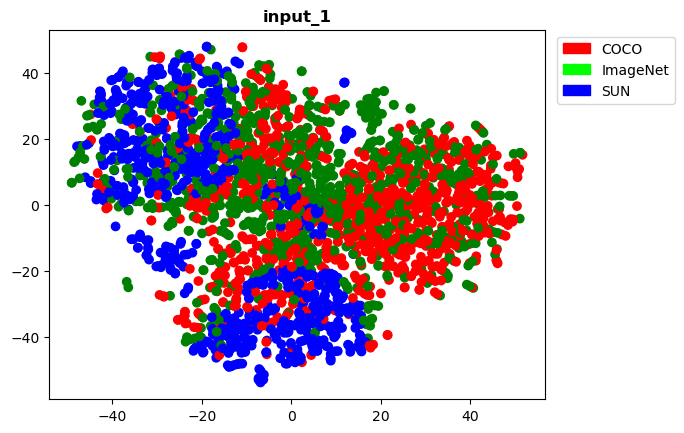

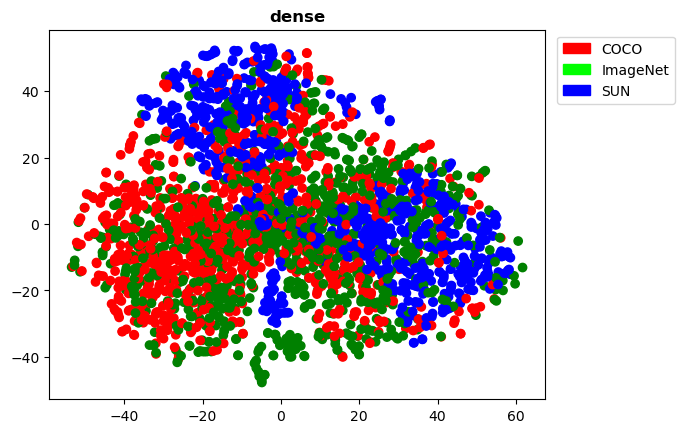

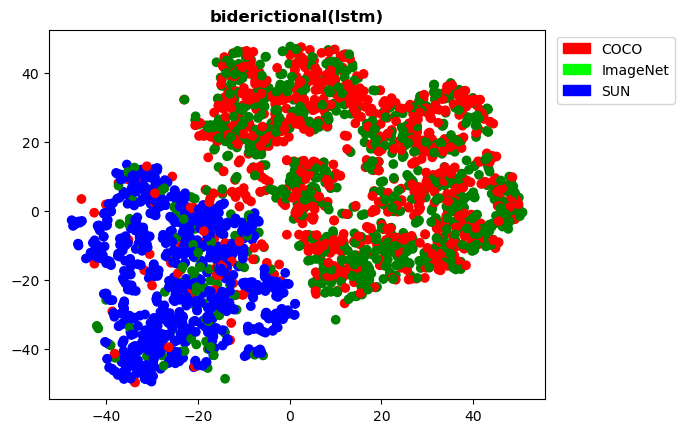

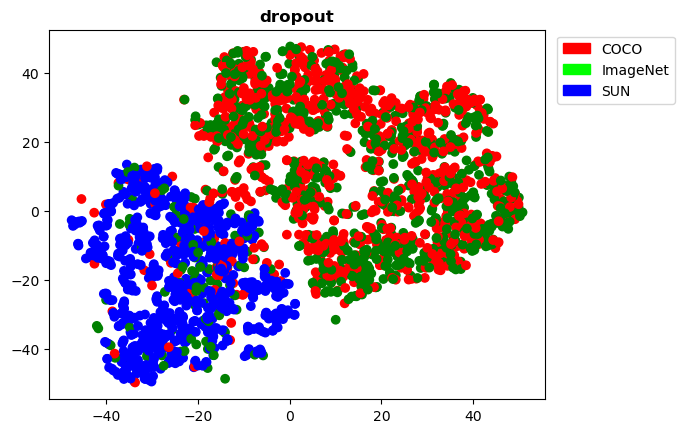

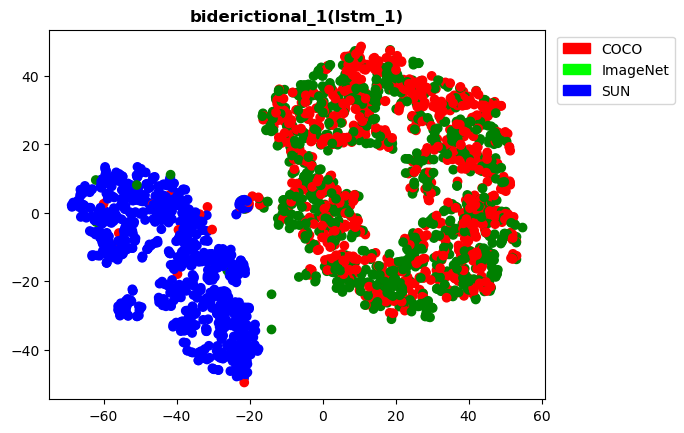

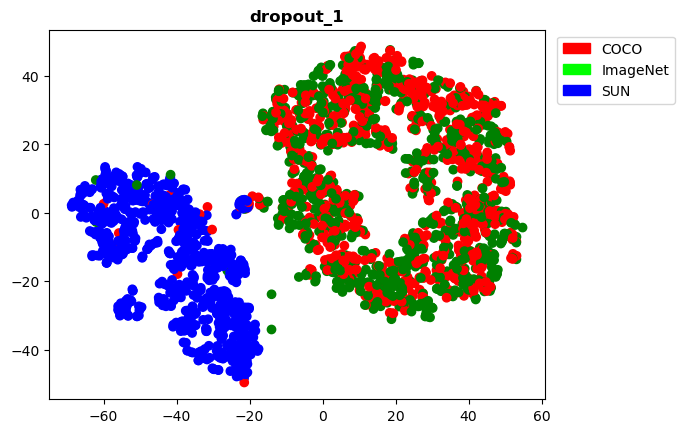

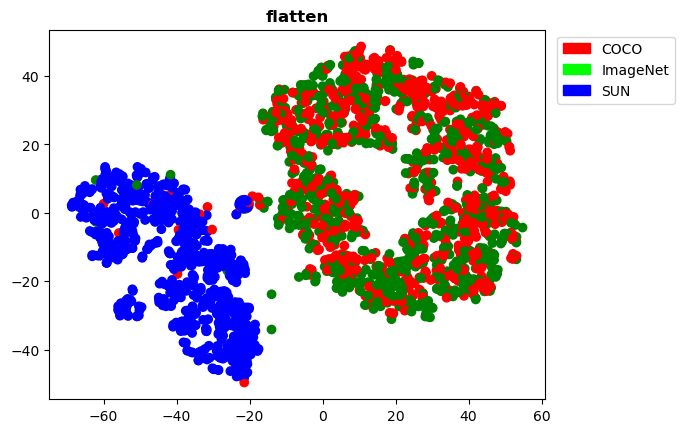

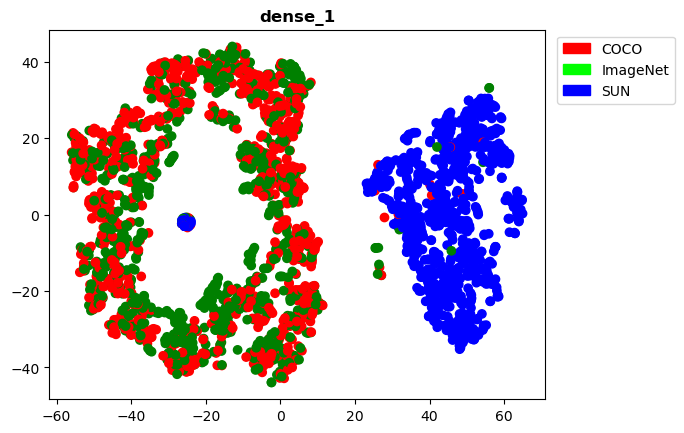

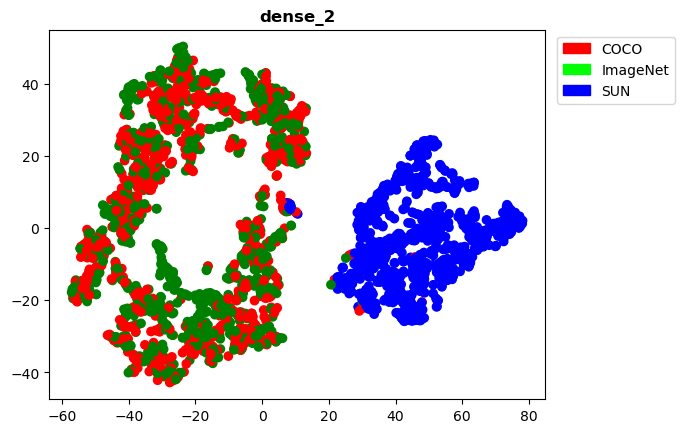

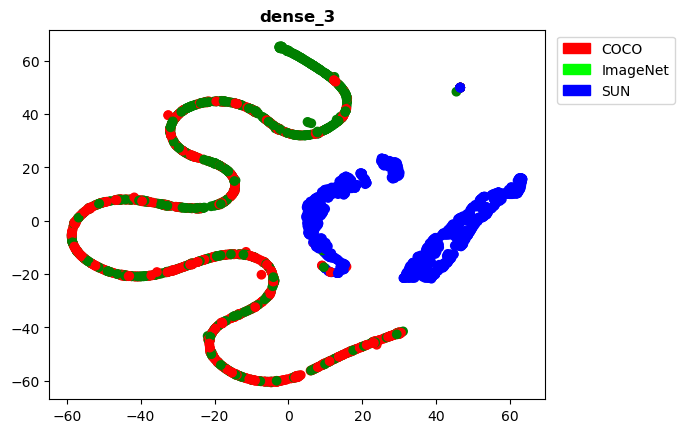

In [88]:
layers = ["input_1", "dense", "biderictional(lstm)", "dropout","biderictional_1(lstm_1)","dropout_1","flatten","dense_1","dense_2","dense_3"]
cols = []
for i in y_test:
    if(i == 0):
        cols.append('r')
    elif i == 1:
        cols.append('g')
    else:
        cols.append('b')
        
for i, embedded_activation in enumerate(embedded_activations):
    plt.figure()
    plt1 = plt.scatter(embedded_activation[:, 0], embedded_activation[:, 1], c=cols)
    plt.title(layers[i], weight="bold")
    red_patch = mpatches.Patch(color=(1, 0, 0), label='COCO')
    green_patch = mpatches.Patch(color=(0, 1, 0), label='ImageNet')
    blue_patch = mpatches.Patch(color=(0, 0, 1), label='SUN')
    plt.legend(handles=[red_patch,green_patch,blue_patch],bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()

In [89]:
color = plt1.get_facecolor()

In [90]:
color[4]

array([0. , 0.5, 0. , 1. ])

In [91]:
color[5]

array([0., 0., 1., 1.])

In [92]:
color[1]

array([0., 0., 1., 1.])